In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#import dataset
fraudcheck_data = pd.read_csv('Fraud_check.csv') 
fraudcheck_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud= fraudcheck_data.rename({'Marital.Status':'wedlock','Taxable.Income':'net_income','City.Population':'C_population','Work.Experience':'Proficiency'},axis=1) #Rename 
fraud.head(4)

,Undergrad,wedlock,net_income,C_population,Proficiency,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [4]:
# Checking the information about Data Frame
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Undergrad     600 non-null    object
 1   wedlock       600 non-null    object
 2   net_income    600 non-null    int64 
 3   C_population  600 non-null    int64 
 4   Proficiency   600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Checking for null values
fraud.isna().sum()

Undergrad       0
wedlock         0
net_income      0
C_population    0
Proficiency     0
Urban           0
dtype: int64

In [6]:
#Condition which is taxable_income<=30000
s1=np.empty(600, dtype=object)   #empty numpy array s1 with 600 elements of object data type
k=0

for value in fraud['net_income']:   
    if value<=30000:
        s1[k]='Risky'
    else:
        s1[k]='Good'
    k=k+1 

In [7]:
x1=pd.DataFrame(s1,columns=['Tax_Value']) #Create a new column based on taxable_income<=30000 condition
x1.head(4)

,Tax_Value
0,Good
1,Good
2,Good
3,Good


In [8]:
fraud = pd.concat([fraud,x1],axis=1)
fraud.head()

,Undergrad,wedlock,net_income,C_population,Proficiency,Urban,Tax_Value
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
# Grouping the Data by categorical column
fraud.groupby(['Undergrad', 'wedlock' ,'Urban']).count()

net_income  C_population  Proficiency  Tax_Value
Undergrad wedlock  Urban                                                  
NO        Divorced NO             53            53           53         53
                   YES            44            44           44         44
          Married  NO             44            44           44         44
                   YES            47            47           47         47
          Single   NO             46            46           46         46
                   YES            54            54           54         54
YES       Divorced NO             50            50           50         50
                   YES            42            42           42         42
          Married  NO             50            50           50         50
                   YES            53            53           53         53
          Single   NO             55            55           55         55
                   YES            62            62           62         62

In [10]:
# Dropping the column
fraud = fraud.drop(['C_population'], axis = 1)
fraud.head(7)

,Undergrad,wedlock,net_income,Proficiency,Urban,Tax_Value
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good
5,NO,Divorced,33329,0,NO,Good
6,NO,Divorced,83357,8,YES,Good


In [11]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['wedlock']= label_encoder.fit_transform(fraud['wedlock'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Tax_Value']= label_encoder.fit_transform(fraud['Tax_Value'])

In [ ]:
fraud.head()

,Undergrad,wedlock,net_income,Proficiency,Urban,Tax_Value
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [12]:
fraud.corr()

,Undergrad,wedlock,net_income,Proficiency,Urban,Tax_Value
Undergrad,1.000000,0.042407,-0.049232,-0.005362,-0.000267,0.012523
wedlock,0.042407,1.000000,-0.012944,-0.002213,0.064562,0.006081
net_income,-0.049232,-0.012944,1.000000,-0.001818,0.070628,-0.688725
Proficiency,-0.005362,-0.002213,-0.001818,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.094559,1.000000,0.004830
Tax_Value,0.012523,0.006081,-0.688725,-0.001972,0.004830,1.000000


In [13]:
x=fraud.iloc[:,0:5]
y=fraud['Tax_Value']

In [15]:
x.head(6)

,Undergrad,wedlock,net_income,Proficiency,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
5,0,0,33329,0,0


In [16]:
x.tail(6)

,Undergrad,wedlock,net_income,Proficiency,Urban
594,0,1,47364,9,1
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0
599,0,0,96519,16,0


In [17]:
y.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: Tax_Value, dtype: int64

In [18]:
y.tail(6)

594    0
595    0
596    0
597    0
598    0
599    0
Name: Tax_Value, dtype: int64

In [19]:
fraud['Tax_Value'].unique()

array([0, 1])

In [20]:
fraud.Tax_Value.value_counts() 

0    476
1    124
Name: Tax_Value, dtype: int64

In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

###**Decision Tree model**

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'x[2] <= 30041.5\nentropy = 0.736\nsamples = 420\nvalue = [333, 87]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 87\nvalue = [0, 87]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 333\nvalue = [333, 0]')]

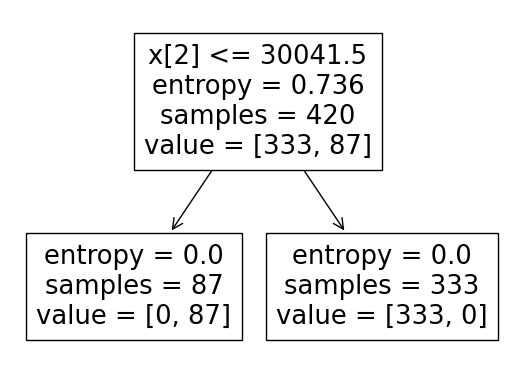

In [ ]:
#Plot the decision tree
tree.plot_tree(model)

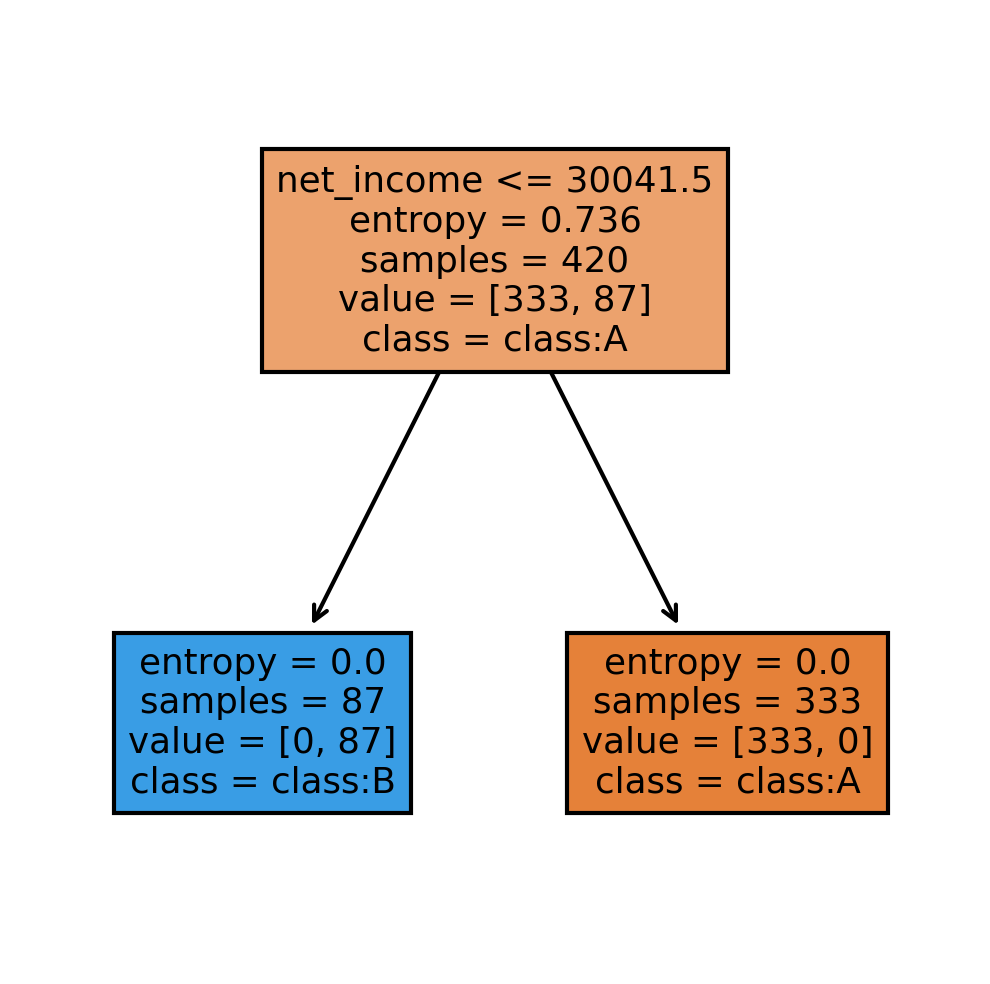

In [ ]:
fn=['Undergrad','wedlock','net_income','Proficiency','Urban']
cn=['class:A', 'class:B']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
     

In [ ]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_2 <= 30041.50
|   |--- class: 1
|--- feature_2 >  30041.50
|   |--- class: 0



In [ ]:
model.feature_importances_

array([0., 0., 1., 0., 0.])

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

net_income     1.0
Undergrad      0.0
wedlock        0.0
Proficiency    0.0
Urban          0.0
dtype: float64

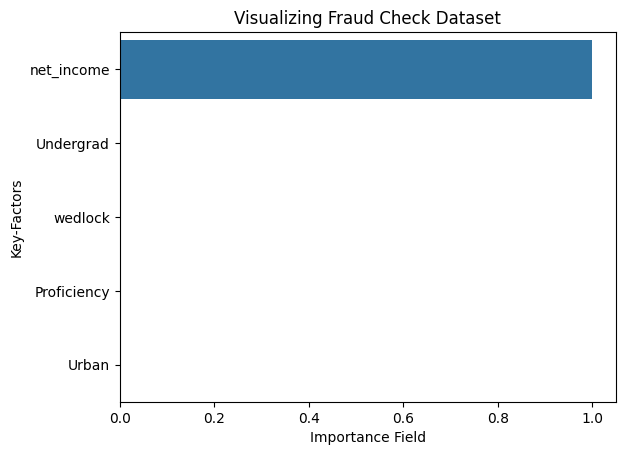

In [ ]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance Field')
plt.ylabel('Key-Factors')
plt.title("Visualizing Fraud Check Dataset")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    143
1     37
dtype: int64

In [ ]:
preds 

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
Tax_Value,,
0,143,0
1,0,37


In [ ]:
#Accuracy 
np.mean(preds==y_test)

1.0

###**Decision Tree Classifier Example**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

### **Decision Tree Regression Example**

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50) 

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
#Find the testing accuracy
model.score(x_test,y_test)

1.0

###grid search using the scikit-learn library

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Create the RandomForestClassifier model
model = RandomForestClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 1.0


###Bagging with a Random Forest Classifier and Boosting with an AdaBoost Classifier

In [23]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with Random Forest Classifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

# Boosting with AdaBoost Classifier
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)

# Compare the accuracies
print("Bagging Accuracy:", bagging_accuracy)
print("Boosting Accuracy:", boosting_accuracy)


Bagging Accuracy: 1.0
Boosting Accuracy: 1.0
